## 1. Introucción y objetivo del análisis

La empresa Telco busca crear un programa de fidelización y desarrollo de programas de fidelización específicos para clientes y mejorar la satisfacción en los servicios ofrecidos por parte de la empresa, además de crear un modelo de machine learning para tratar de predecir de manera eficiente y eficaz la satisfacción de los clientes y como consecuencia captarlos y que sigan contratando los servicios de Telco.

En este estudio se realiza un EDA se está utilizando información procedente de la página Kaggle 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data'. El objetivo principal de esta primera fase es comprender la estructura del dataset, evaluar la calidad de los datos y analizar la satisfacción del cliente con los servicios contratados.

A lo largo del análisis se emplean técnicas descriptivas y visuales con el fin de identificar patrones,tendencias y posibles anomalías en los datos permitiendo justificar la selección de variables revelantes para el modelo posterior, el tratamiento de valores atípicos o el análisis de correlaciones se integran de forma práctica a lo largo del notebook, aplicadas directamente al estudio.

## 2. Contexto del análisis y flujo de trabajo

### 2.1 ¿Qué es el EDA y por qué es necesario?

El Análisis Exploratorio de Datos(EDA) es una fase inicial del análisis de datos cuyo objetivo es comprender la estructura, el contenido y la calidad de un conjunto de datos antes de aplicar técnicas estadísticas avanzadas o modelos predictivos. 
A través del EDA se analizan las características principales de las variables, se identifican patrones,tendencias, relaciones, y se detectan posibles anomalias o problemas en los datos.

El propósito principal del EDA es extraer conocimiento a partir de los datos, mas allá de obtener resultados numéricos. Mediante estadísticas descriptivas y visualizaciones, el EDA permite entender como se distribuyen las variables, 
como evolucionan en el tiempo y cómo interactúan entre sí. En este estudio, el EDA se utiliza para analizar la satisfacción del cliente y los servicios contratados.

El EDA es un paso imprescindible antes de analizar modelos predictivos, ya que permite tomar decisiones fundamentadas sobre la preparación de los datos y diseño del modelo. Sin un análisis exploratorio previo, es fácil pasar por alto valores atípicos o inconsistencias que puedan afectar negativamente al rendimiento y la interpretabilidad del modelo. En el contexto de este proyecto, el EDA sirve como base para la selección de variables relevantes, la creación de nuevas características y la validación conceptual de un modelo predictivo orientado a estimar la evolución de la mortalidad.

### 2.2 Flujo general de proyecto

#### 1. Importación de librerías de Python

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msns
import warnings
warnings.filterwarnings('ignore')

Definición de la paleta de colores utilizada para las gráficas

In [169]:
# ========================================
# PALETA DE COLORES TELECOM MODERNA 🎨
# ========================================
# Definir la paleta de colores corporativa
COLORES_TELCO = {
    'azul_profundo': '#0A2540',      # Confianza, solidez
    'azul_medio': '#1F6AE1',         # Innovación, conectividad
    'celeste': '#4FA3FF',            # Velocidad, datos
    'verde_lima': '#2ED3A7',         # Éxito, retención
    'naranja': '#FF9F43',            # Alerta, riesgo
    'gris_neutro': '#E6E9EF'         # Limpieza, profesionalismo
}

# Alias para uso más fácil
POSITIVO = COLORES_TELCO['verde_lima']
NEGATIVO = COLORES_TELCO['naranja']
PRINCIPAL = COLORES_TELCO['azul_medio']
SECUNDARIO = COLORES_TELCO['celeste']
TITULO = COLORES_TELCO['azul_profundo']
FONDO = COLORES_TELCO['gris_neutro']

print("✅ Paleta Telecom Moderna cargada!")

✅ Paleta Telecom Moderna cargada!


#### 2. Carga de datos

In [170]:
df = pd.read_csv("../csv/telco.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Vista general de las variables numéricas

In [171]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [172]:
df_copy = df.copy()
df_copy.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Voy a cambiar el tipo de dato que no será necesario tras la limpieza a la columna TotalCharges

In [173]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

#### 3. Análisis Univariado

##### 3.1 Análisis de las variables numéricas

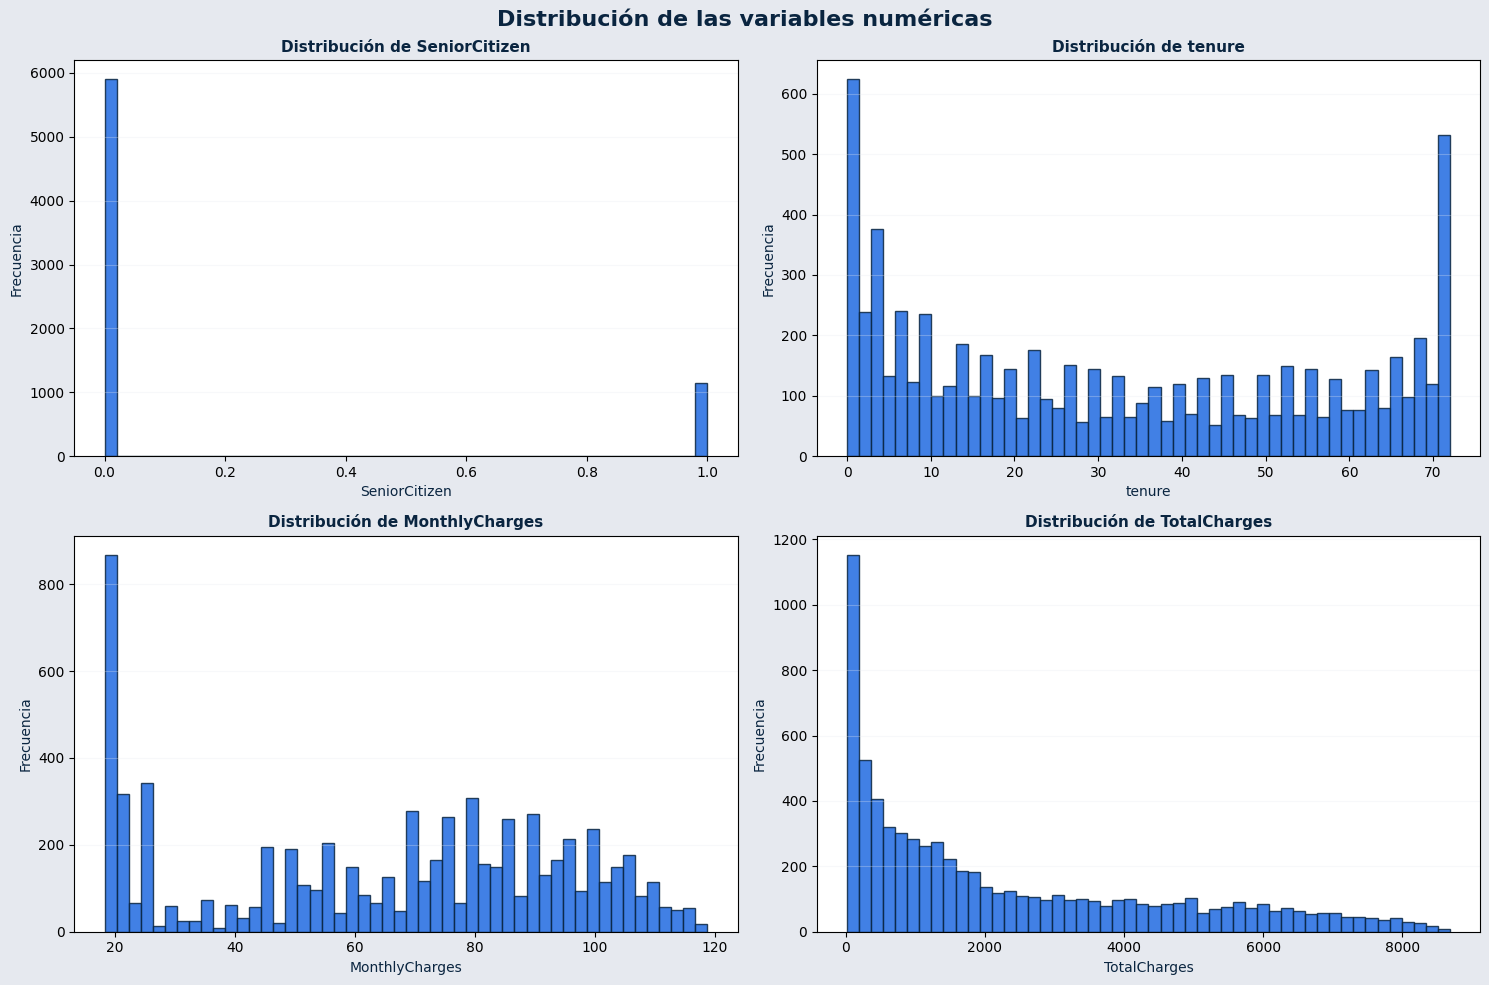

In [174]:
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
fig = plt.figure(figsize=(15, 10), facecolor=FONDO)
for i, col in enumerate(variables_numericas, 1):
    ax = fig.add_subplot(2, 2, i)
    ax.hist(df[col], bins=50, color=PRINCIPAL, edgecolor=TITULO, alpha=0.85)
    ax.set_title(f'Distribución de {col}', fontsize=11, fontweight='bold', color=TITULO)
    ax.set_xlabel(col, fontsize=10, color=TITULO)
    ax.set_ylabel('Frecuencia', fontsize=10, color=TITULO)
    ax.grid(axis='y', alpha=0.3, color=FONDO)

plt.suptitle("Distribución de las variables numéricas", fontsize=16, fontweight='bold', color=TITULO)
plt.tight_layout()
plt.show()

Análisis de correlación

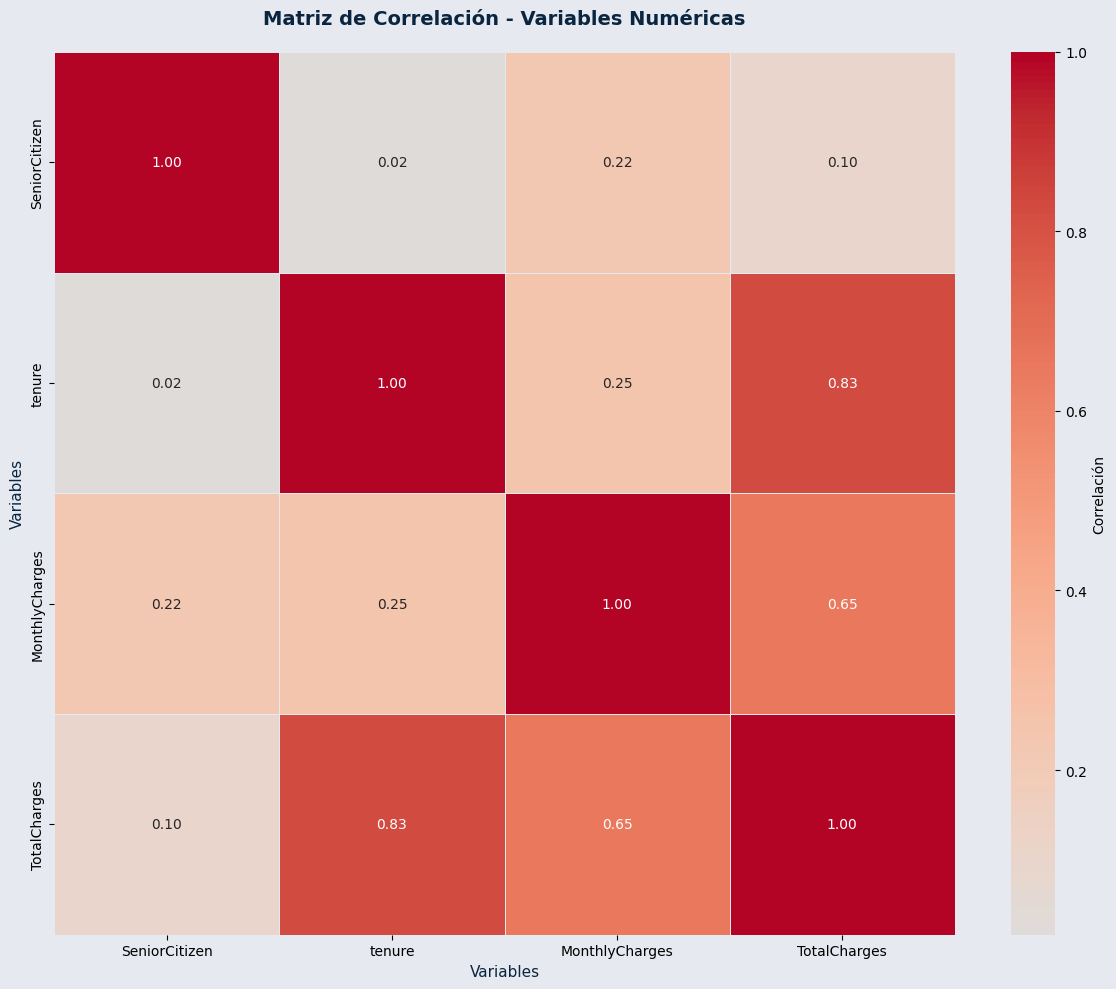

In [175]:
numeric_cols = df[variables_numericas]
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10), facecolor=FONDO)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            cbar_kws={'label': 'Correlación'},
            linewidths=0.5, linecolor=FONDO)
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=14, fontweight='bold', color=TITULO, pad=20)
plt.xlabel('Variables', fontsize=11, color=TITULO)
plt.ylabel('Variables', fontsize=11, color=TITULO)
plt.tight_layout()
plt.show()

Detección de outlierts

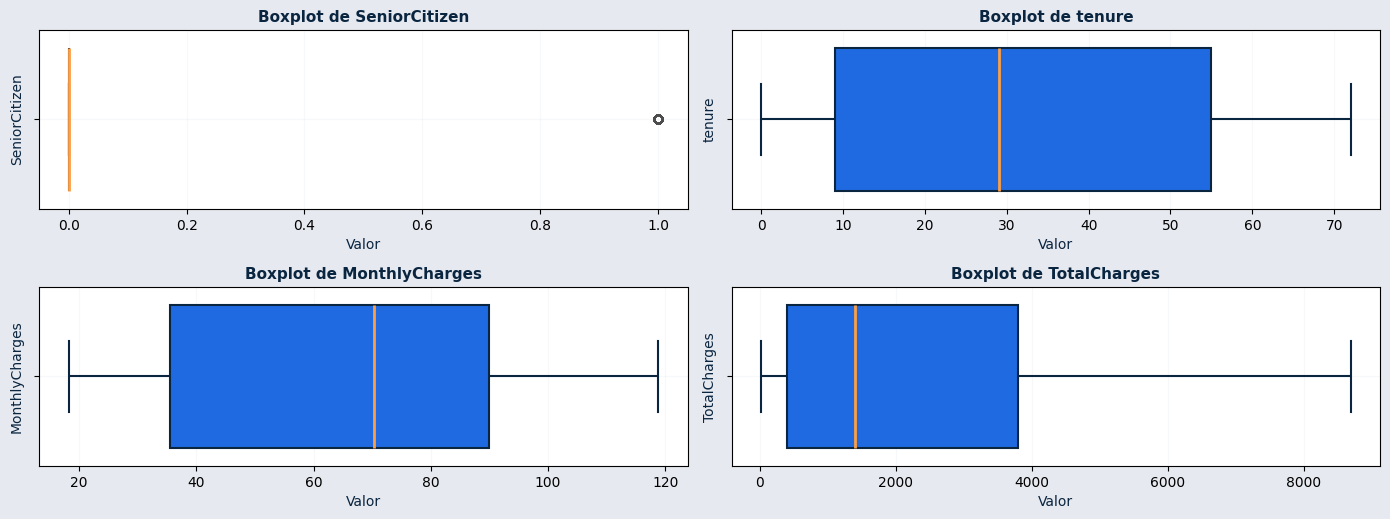

In [176]:
plt.figure(figsize=(14,10), facecolor=FONDO)

# Ajustamos la cuadrícula a 4 filas y 2 columnas para acomodar los gráficos
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(4, 2, i) # Cambiamos de 3, 2 a 4, 2
    sns.boxplot(
        x=df[col], # Aquí se define como se muestra el boxplot, en horizontal o vertical
        orient='h',       # Esto hace automáticamente los quartiles
        color=PRINCIPAL,
        boxprops=dict(facecolor=PRINCIPAL, edgecolor=TITULO, linewidth=1.5),
        medianprops=dict(color=NEGATIVO, linewidth=2),
        whiskerprops=dict(color=TITULO, linewidth=1.5),
        capprops=dict(color=TITULO, linewidth=1.5)
    )
    plt.title(f'Boxplot de {col}', fontsize=11, fontweight='bold', color=TITULO)
    plt.ylabel(col, color=TITULO)
    plt.xlabel('Valor', color=TITULO)
    plt.grid(True, alpha=0.3, color=FONDO)

plt.tight_layout()
plt.show()

Convertir Churn a formato numérico y comparación con las variables numéricas

Transformar la variable categórica 'Churn' en un formato numérico binario (por ejemplo, 'Yes' a 1 y 'No' a 0) para facilitar el análisis cuantitativo y el cálculo de correlaciones con otras variables numéricas.

In [177]:
#Creación de una nueva columna en formato binario
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


Comparar cantidad de datos con Churn binary

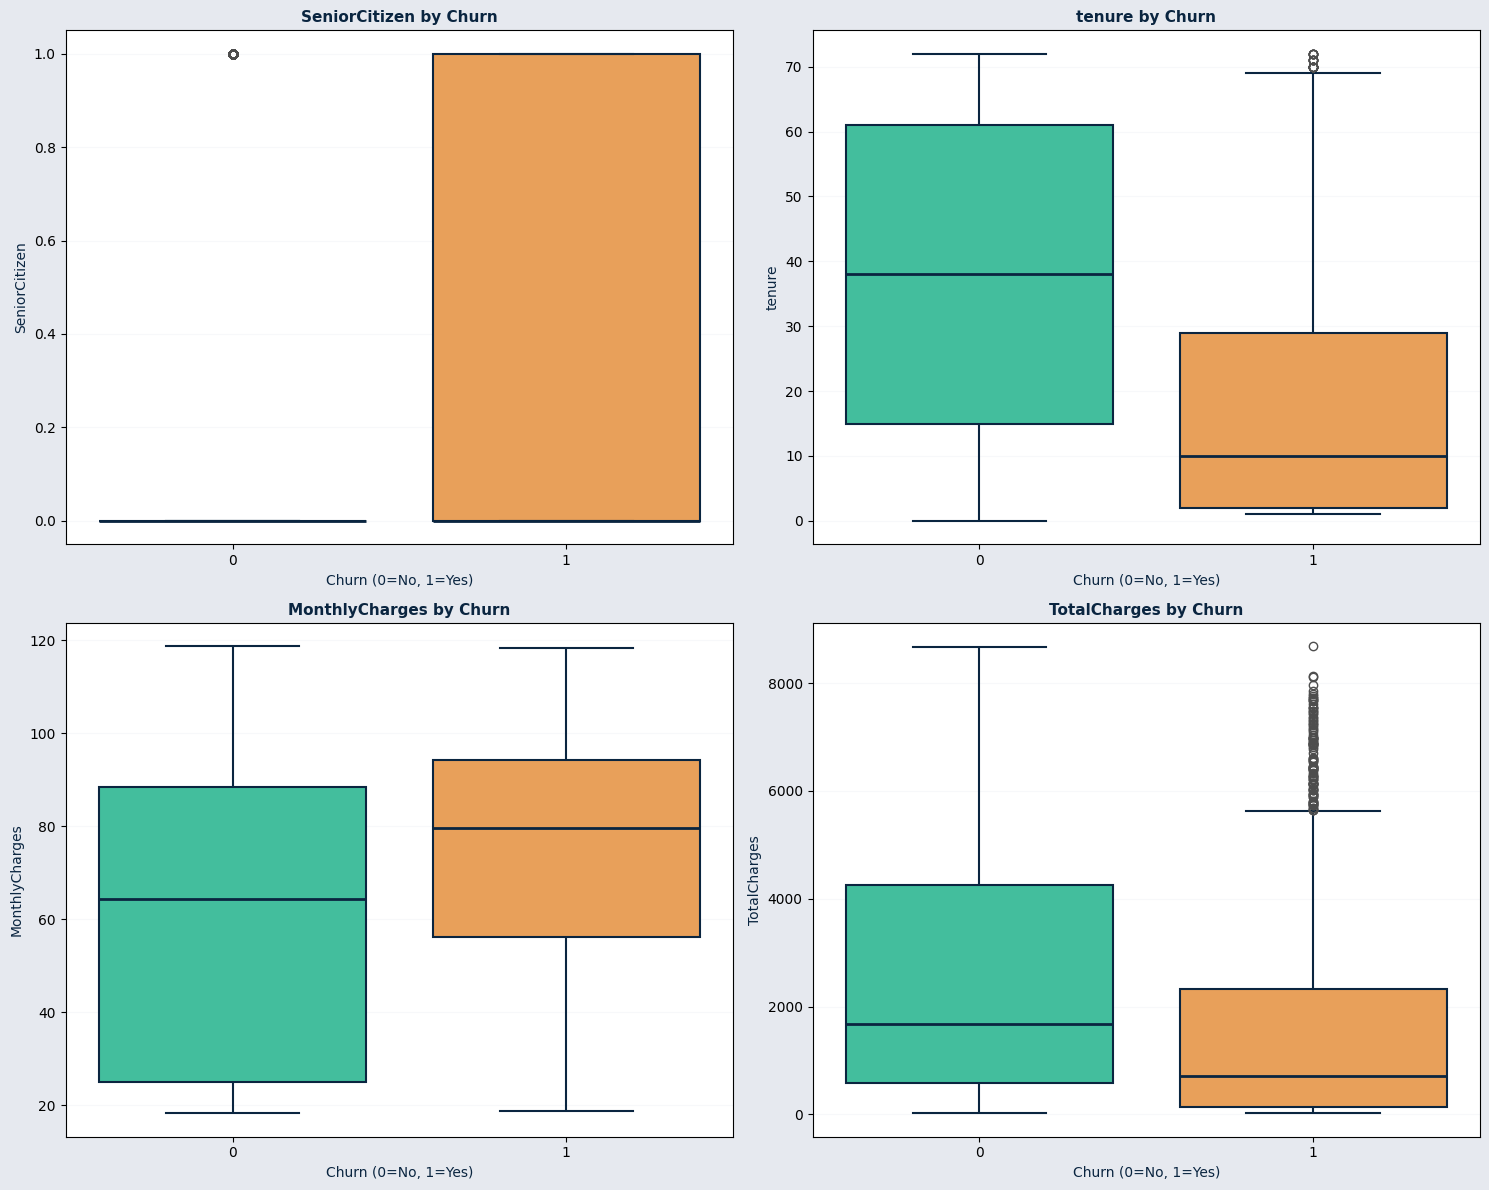

In [178]:
plt.figure(figsize=(15, 12), facecolor=FONDO)
for idx, col in enumerate(variables_numericas):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(x='Churn_binary', y=col, data=df, 
                palette={'0': POSITIVO, '1': NEGATIVO},
                boxprops=dict(edgecolor=TITULO, linewidth=1.5),
                medianprops=dict(color=TITULO, linewidth=2),
                whiskerprops=dict(color=TITULO, linewidth=1.5),
                capprops=dict(color=TITULO, linewidth=1.5))
    plt.title(f'{col} by Churn', fontsize=11, fontweight='bold', color=TITULO)
    plt.xlabel('Churn (0=No, 1=Yes)', color=TITULO)
    plt.ylabel(col, color=TITULO)
    plt.grid(True, alpha=0.3, color=FONDO, axis='y')
plt.tight_layout()
plt.show()

In [179]:
correlation_with_churn = df.corr(numeric_only=True)['Churn_binary'].sort_values(ascending=False)
print("Correlations with Churn_binary:\n", correlation_with_churn)

Correlations with Churn_binary:
 Churn_binary      1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_binary, dtype: float64


Visualizar la correlación con Churn usando un mapa de calor

Representar gráficamente la correlación entre la variable Churn y las demás variables numéricas mediante un mapa de calor (heatmap), lo que permite identificar de forma rápida e intuitiva qué características están más fuertemente asociadas con la rotación de clientes.

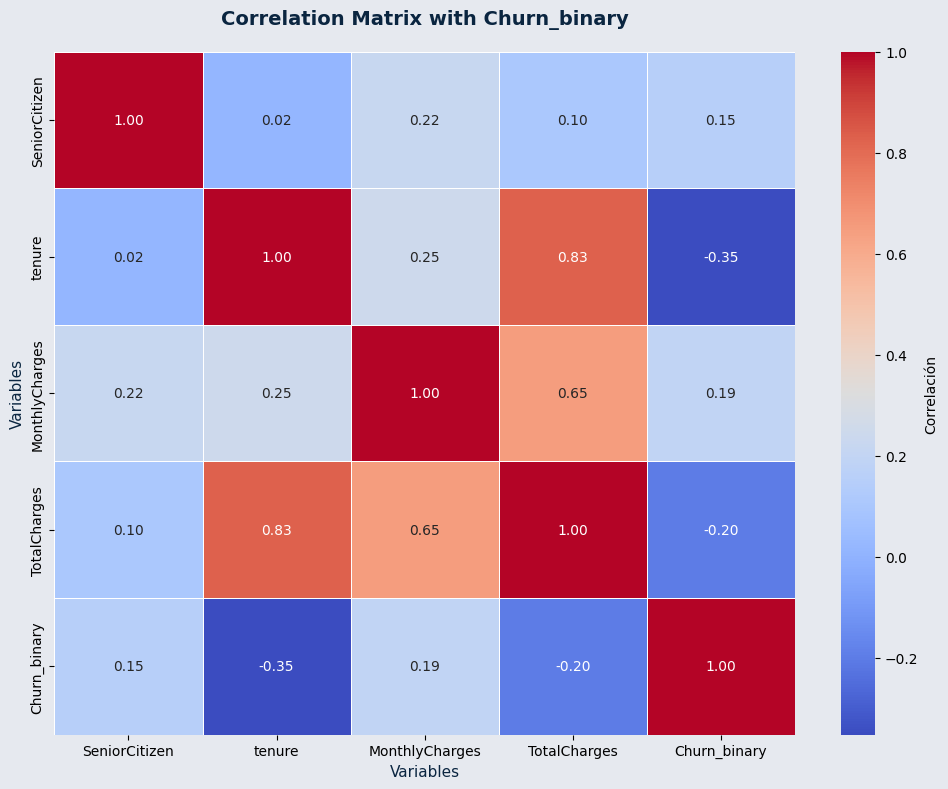

In [180]:
numeric_cols_with_churn = variables_numericas + ['Churn_binary']
correlation_matrix_with_churn = df[numeric_cols_with_churn].corr()

plt.figure(figsize=(10, 8), facecolor=FONDO)
sns.heatmap(correlation_matrix_with_churn, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5,
            cbar_kws={'label': 'Correlación'})
plt.title('Correlation Matrix with Churn_binary', fontsize=14, fontweight='bold', color=TITULO, pad=20)
plt.xlabel('Variables', fontsize=11, color=TITULO)
plt.ylabel('Variables', fontsize=11, color=TITULO)
plt.tight_layout()
plt.show()

##### 3.2 Análisis de las variables categóricas

Porcentaje de genero de clientes y conteo de los mismos. ¿Que genero es mas propensa a contratar nuestros servicios?

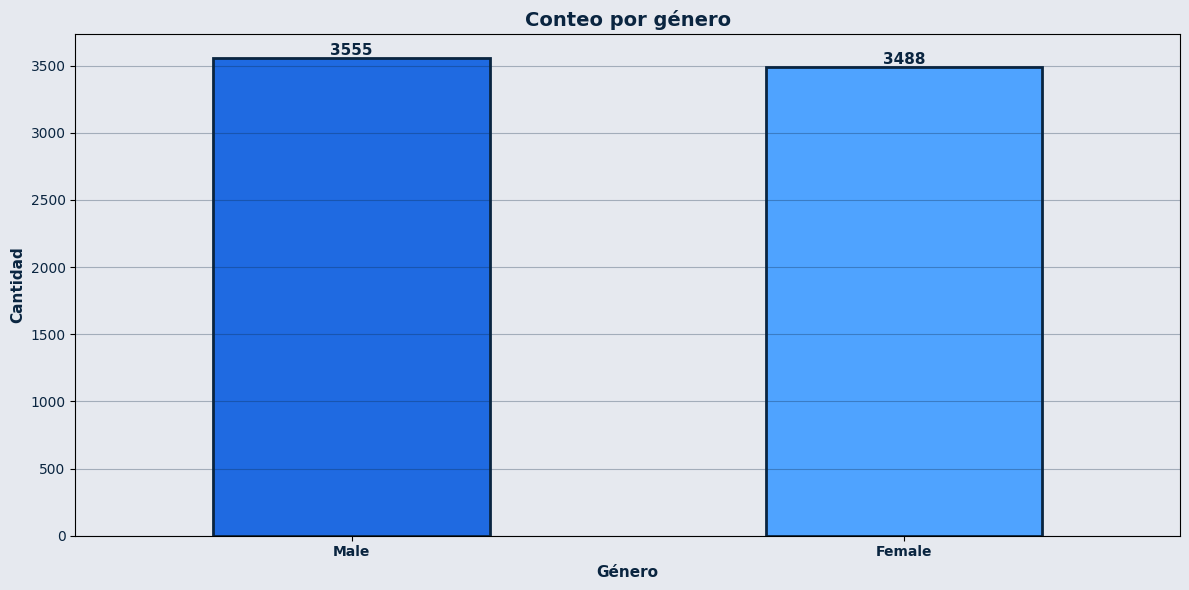

In [181]:
# Conteo por género
conteo_genero = df_copy['gender'].value_counts()

# Gráfica de barras
plt.figure(figsize=(12,6), facecolor=FONDO)
ax = conteo_genero.plot(kind='bar', color=[PRINCIPAL, SECUNDARIO], edgecolor=TITULO, linewidth=2)
ax.set_facecolor(FONDO)

plt.title('Conteo por género', fontsize=14, fontweight='bold', color=TITULO)
plt.xlabel('Género', fontsize=11, color=TITULO, fontweight='bold')
plt.ylabel('Cantidad', fontsize=11, color=TITULO, fontweight='bold')
plt.grid(axis='y', alpha=0.3, color=TITULO)
plt.xticks(rotation=0, color=TITULO, fontweight='bold')
plt.yticks(color=TITULO)

# Añadir el valor exacto encima de cada barra
for i, valor in enumerate(conteo_genero.values):
    ax.text(i, valor, str(valor), ha='center', va='bottom', fontweight='bold', fontsize=11, color=TITULO)

plt.tight_layout()
plt.show()

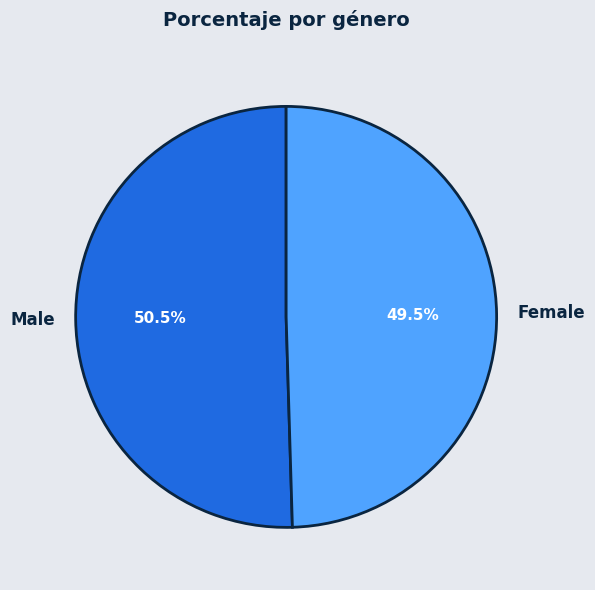

In [182]:
# Porcentaje por género
porcentaje_genero = df['gender'].value_counts(normalize=True) * 100

# Gráfica de tarta
plt.figure(figsize=(12,6), facecolor=FONDO)
wedges, texts, autotexts = plt.pie(porcentaje_genero, autopct='%1.1f%%', 
                                     colors=[PRINCIPAL, SECUNDARIO], 
                                     labels=porcentaje_genero.index,
                                     startangle=90,
                                     wedgeprops={'edgecolor': TITULO, 'linewidth': 2})
plt.title('Porcentaje por género', fontsize=14, fontweight='bold', color=TITULO, pad=20)

# Mejorar apariencia de las etiquetas
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color(TITULO)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.ylabel('')
plt.tight_layout()
plt.show()

Vemos que los datos contienen valores muy parejos en cuanto al género de personas que contratan servicios en Telco. Por lo que no podemos decir que predomine un género a la hora de la contratación.

¿Cuantos clientes tiene lineas de telefono contratados? ¿y servicio de internet?

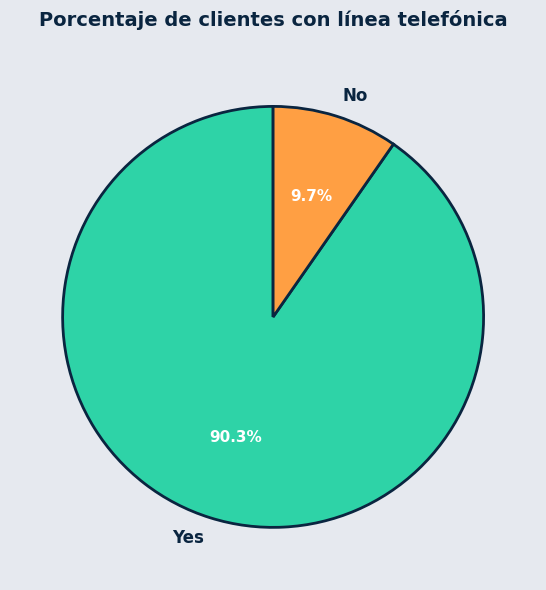

In [183]:
# Porcentaje por servicio telefónico
porcentaje_phone = df['PhoneService'].value_counts(normalize=True) * 100

# Gráfica de tarta
plt.figure(figsize=(12,6), facecolor=FONDO)
wedges, texts, autotexts = plt.pie(porcentaje_phone, autopct='%1.1f%%', 
                                     colors=[POSITIVO, NEGATIVO], 
                                     labels=porcentaje_phone.index,
                                     startangle=90,
                                     wedgeprops={'edgecolor': TITULO, 'linewidth': 2})
plt.title('Porcentaje de clientes con línea telefónica', fontsize=14, fontweight='bold', color=TITULO, pad=20)

# Mejorar apariencia de las etiquetas
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color(TITULO)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.ylabel('')
plt.tight_layout()
plt.show()

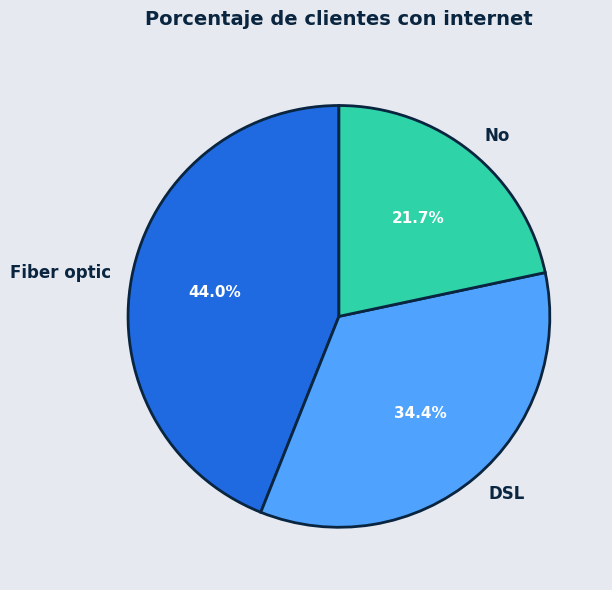

In [184]:
# Porcentaje por servicio de internet
porcentaje_internet = df['InternetService'].value_counts(normalize=True) * 100

# Gráfica de tarta
plt.figure(figsize=(12,6), facecolor=FONDO)
wedges, texts, autotexts = plt.pie(porcentaje_internet, autopct='%1.1f%%', 
                                     colors=[PRINCIPAL, SECUNDARIO, POSITIVO][:len(porcentaje_internet)], 
                                     labels=porcentaje_internet.index,
                                     startangle=90,
                                     wedgeprops={'edgecolor': TITULO, 'linewidth': 2})
plt.title('Porcentaje de clientes con internet', fontsize=14, fontweight='bold', color=TITULO, pad=20)

# Mejorar apariencia de las etiquetas
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color(TITULO)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.ylabel('')
plt.tight_layout()
plt.show()

La mayoría de clientes tienen contratado linea telefonica con Telco, aunque tambien muchos de nuestros clientes tienen servicio de internet contratado. Siempre tienen o una u otra contratada no coincide ningun que no tenga algun contratado con nuestra empresa.

¿Cuales son los servicios de internet mas contratados? ¿Cuantas personas tienen todos los servicios contratados?

Clientes con servicio de internet: 5517 de 7043
Clientes con todos los servicios de internet contratados: 284 (5.15%)


,Yes_count,Percentage
OnlineSecurity,2019.0,36.60
OnlineBackup,2429.0,44.03
DeviceProtection,2422.0,43.90
TechSupport,2044.0,37.05
StreamingTV,2707.0,49.07
StreamingMovies,2732.0,49.52
All_Services,284.0,5.15


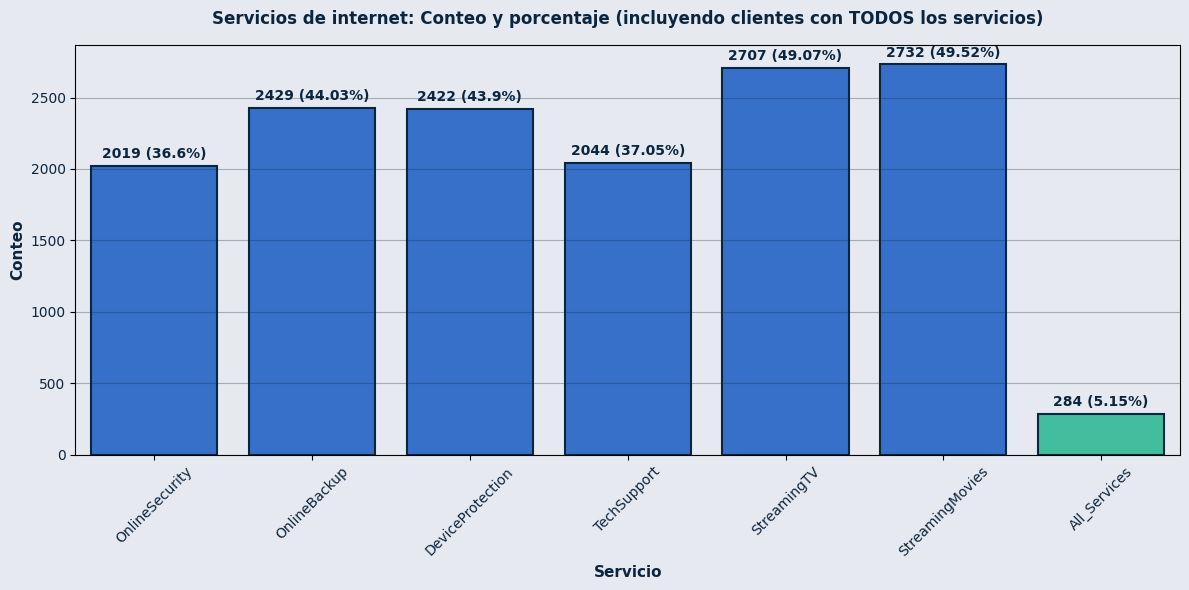

In [185]:
# Filtrar clientes que tienen servicio de internet (no 'No')
df_internet = df[df['InternetService'].astype(str).str.lower() != 'no'].copy()
n_internet = len(df_internet)
print(f"Clientes con servicio de internet: {n_internet} de {len(df)}")

# Columnas de interés
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

if n_internet == 0:
    print('No hay clientes con servicio de internet en el dataset filtrado.')
else:
    # Conteos de 'Yes' y porcentajes respecto al total con internet
    yes_counts = (df_internet[cols] == 'Yes').sum().rename('Yes_count')
    percentages = (yes_counts / n_internet * 100).round(2).rename('Percentage')

    summary = pd.concat([yes_counts, percentages], axis=1)
    # Clientes que tienen todos los servicios marcados como 'Yes'
    all_mask = (df_internet[cols].fillna('No') == 'Yes').all(axis=1)
    count_all = int(all_mask.sum())
    pct_all = round(count_all / n_internet * 100, 2) if n_internet > 0 else 0
    print(f"Clientes con todos los servicios de internet contratados: {count_all} ({pct_all}%)")
    # Agregar fila resumen a la tabla
    summary_with_all = summary.copy()
    summary_with_all.loc['All_Services'] = [count_all, pct_all]
    display(summary_with_all)

    # Gráfica única: barras con conteo y porcentaje anotado (incluyendo All_Services)
    plot_data = summary_with_all.reset_index()
    plt.figure(figsize=(12,6), facecolor=FONDO)
    # Usar colores Telecom Moderna: servicios individuales en azul, todos en verde
    bar_colors = [PRINCIPAL]*len(summary) + [POSITIVO]
    ax = sns.barplot(x='index', y='Yes_count', data=plot_data, palette=bar_colors, 
                     edgecolor=TITULO, linewidth=1.5)
    ax.set_facecolor(FONDO)
    
    max_count = max(plot_data['Yes_count']) if len(plot_data) > 0 else 0
    for i, row in plot_data.iterrows():
        ax.text(i, row['Yes_count'] + max_count*0.02, f"{int(row['Yes_count'])} ({row['Percentage']}%)", 
                ha='center', fontweight='bold', fontsize=10, color=TITULO)
    
    plt.title('Servicios de internet: Conteo y porcentaje (incluyendo clientes con TODOS los servicios)', 
              fontsize=12, fontweight='bold', color=TITULO, pad=15)
    plt.ylabel('Conteo', fontsize=11, color=TITULO, fontweight='bold')
    plt.xlabel('Servicio', fontsize=11, color=TITULO, fontweight='bold')
    plt.xticks(rotation=45, color=TITULO)
    plt.yticks(color=TITULO)
    plt.grid(axis='y', alpha=0.3, color=TITULO)
    plt.tight_layout()
    plt.show()

Los servicios mas contratados por los clientes son tanto TV como plataforma de peliculas siendo casi un 50% de los clientes que tienen servicio de internet los que cuentan con estos servicios.

## IDEA: ver cuantas personas tienen todos los servicios contratados y ver si se le puede hacer una oferta especial. y aplicar promociones a los servicios mas contratados para mayor fidelidad.

¿Que genero tiende a tener una mayor fidelidad?

Estadísticas de permanencia (meses) por género:


Female:
  Clientes: 3488
  Permanencia promedio: 32.24 meses
  Permanencia mediana: 29 meses
  Rango: 0 - 72 meses
  Desviación estándar: 24.46

Male:
  Clientes: 3555
  Permanencia promedio: 32.5 meses
  Permanencia mediana: 29 meses
  Rango: 0 - 72 meses
  Desviación estándar: 24.66


,Género,Métrica,Valor
0,Female,Count,3488.00
1,Female,Mean,32.24
2,Female,Median,29.00
3,Female,Min,0.00
4,Female,Max,72.00
5,Female,Std,24.46
6,Male,Count,3555.00
7,Male,Mean,32.50
8,Male,Median,29.00
9,Male,Min,0.00


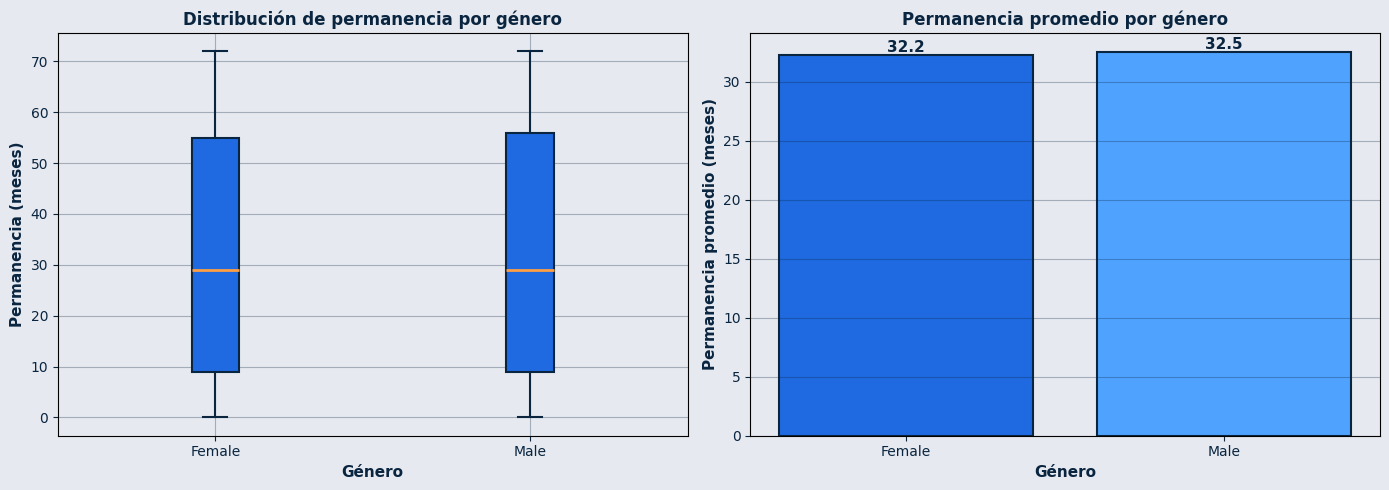

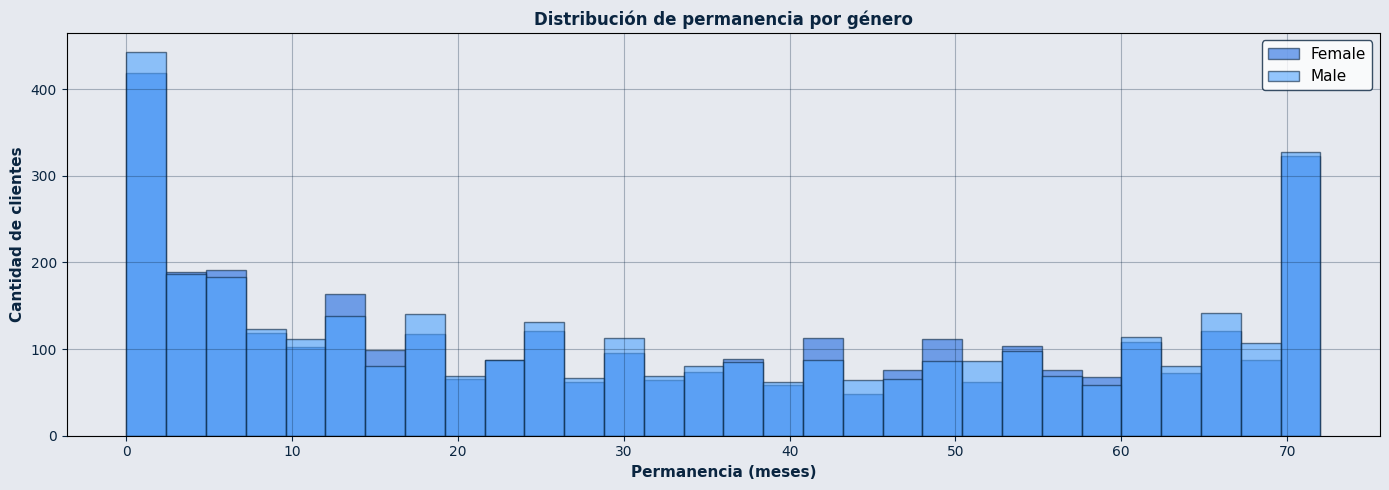

In [186]:
# Análisis de permanencia (tenure) por género
generos = df['gender'].unique()

# Estadísticas descriptivas de permanencia por género
print("Estadísticas de permanencia (meses) por género:\n")
tenure_stats = {}
for genre in generos:
    df_genre = df[df['gender'] == genre]
    tenure_data = df_genre['tenure'].astype(int)
    
    stats = {
        'Count': len(tenure_data),
        'Mean': round(tenure_data.mean(), 2),
        'Median': int(tenure_data.median()),
        'Min': int(tenure_data.min()),
        'Max': int(tenure_data.max()),
        'Std': round(tenure_data.std(), 2)
    }
    tenure_stats[genre] = stats
    
    print(f"\n{genre}:")
    print(f"  Clientes: {stats['Count']}")
    print(f"  Permanencia promedio: {stats['Mean']} meses")
    print(f"  Permanencia mediana: {stats['Median']} meses")
    print(f"  Rango: {stats['Min']} - {stats['Max']} meses")
    print(f"  Desviación estándar: {stats['Std']}")

# Crear DataFrame para visualización
summary_tenure = []
for genre in generos:
    for key, value in tenure_stats[genre].items():
        summary_tenure.append({'Género': genre, 'Métrica': key, 'Valor': value})

df_tenure_summary = pd.DataFrame(summary_tenure)
display(df_tenure_summary)

# Gráfica 1: Box plot comparativo de permanencia por género
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor=FONDO)
fig.patch.set_facecolor(FONDO)
for ax in axes:
    ax.set_facecolor(FONDO)

# Box plot
tenure_by_gender = [df[df['gender'] == genre]['tenure'].astype(int) for genre in generos]
bp = axes[0].boxplot(tenure_by_gender, labels=generos, patch_artist=True,
                      boxprops=dict(facecolor=PRINCIPAL, edgecolor=TITULO, linewidth=1.5),
                      medianprops=dict(color=NEGATIVO, linewidth=2),
                      whiskerprops=dict(color=TITULO, linewidth=1.5),
                      capprops=dict(color=TITULO, linewidth=1.5))
axes[0].set_ylabel('Permanencia (meses)', fontsize=11, color=TITULO, fontweight='bold')
axes[0].set_xlabel('Género', fontsize=11, color=TITULO, fontweight='bold')
axes[0].set_title('Distribución de permanencia por género', fontsize=12, fontweight='bold', color=TITULO)
axes[0].grid(True, alpha=0.3, color=TITULO)
axes[0].tick_params(colors=TITULO)

# Barras con promedio
means = [tenure_stats[genre]['Mean'] for genre in generos]
colors_bar = [PRINCIPAL, SECUNDARIO]
bars = axes[1].bar(generos, means, color=colors_bar, edgecolor=TITULO, linewidth=1.5)
axes[1].set_ylabel('Permanencia promedio (meses)', fontsize=11, color=TITULO, fontweight='bold')
axes[1].set_xlabel('Género', fontsize=11, color=TITULO, fontweight='bold')
axes[1].set_title('Permanencia promedio por género', fontsize=12, fontweight='bold', color=TITULO)
axes[1].grid(True, alpha=0.3, axis='y', color=TITULO)
axes[1].tick_params(colors=TITULO)

# Añadir valores en las barras
for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{mean:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11, color=TITULO)

plt.tight_layout()
plt.show()

# Histograma de permanencia por género
plt.figure(figsize=(14, 5), facecolor=FONDO)
ax = plt.gca()
ax.set_facecolor(FONDO)
for genre, color in zip(generos, [PRINCIPAL, SECUNDARIO]):
    tenure_data = df[df['gender'] == genre]['tenure'].astype(int)
    plt.hist(tenure_data, bins=30, alpha=0.6, label=genre, color=color, edgecolor=TITULO, linewidth=1)

plt.xlabel('Permanencia (meses)', fontsize=11, color=TITULO, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=11, color=TITULO, fontweight='bold')
plt.title('Distribución de permanencia por género', fontsize=12, fontweight='bold', color=TITULO)
plt.legend(fontsize=11, edgecolor=TITULO)
plt.grid(True, alpha=0.3, color=TITULO)
plt.tick_params(colors=TITULO)
plt.tight_layout()
plt.show()

¿Que servicios contratan más, dependiendo del género?

Géneros en el dataset: ['Female' 'Male']


=== FEMALE (2741 clientes) ===


,Conteo,Porcentaje
OnlineSecurity,1027,37.47
OnlineBackup,1226,44.73
DeviceProtection,1203,43.89
TechSupport,1027,37.47
StreamingTV,1355,49.43
StreamingMovies,1371,50.02



=== MALE (2776 clientes) ===


,Conteo,Porcentaje
OnlineSecurity,992,35.73
OnlineBackup,1203,43.34
DeviceProtection,1219,43.91
TechSupport,1017,36.64
StreamingTV,1352,48.70
StreamingMovies,1361,49.03


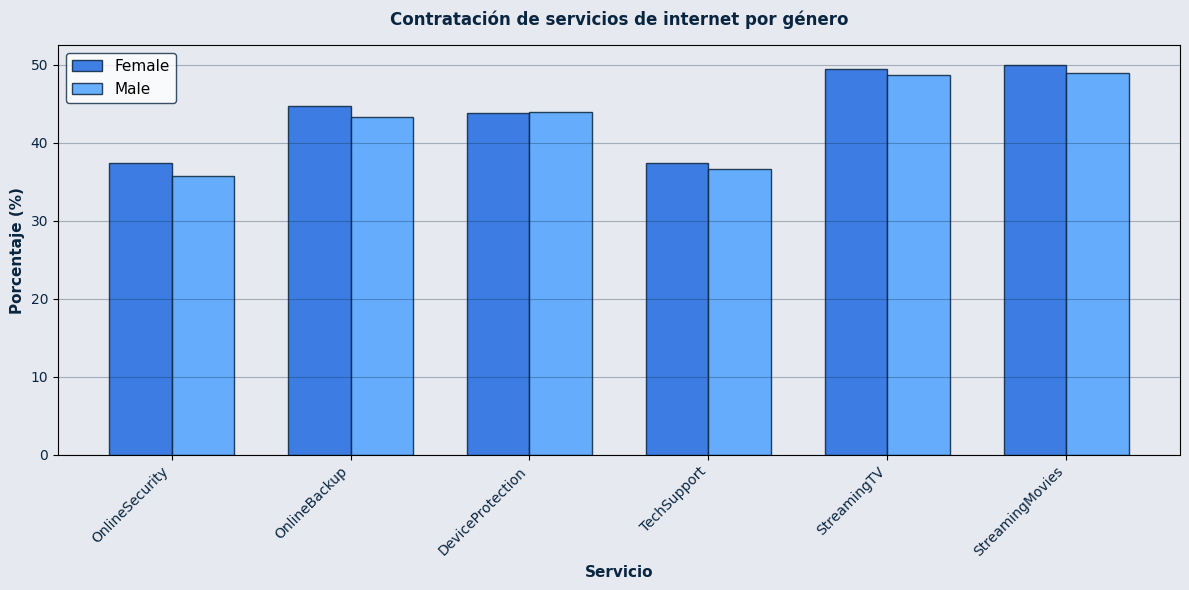

In [187]:
# Análisis de servicios por género
# Filtrar solo clientes con InternetService
df_internet_gender = df[df['InternetService'].astype(str).str.lower() != 'no'].copy()
cols_services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Obtener géneros únicos
genders = df_internet_gender['gender'].unique()
print(f"Géneros en el dataset: {genders}\n")

# Crear un resumen por género
gender_summaries = {}
for gender in genders:
    df_gender = df_internet_gender[df_internet_gender['gender'] == gender]
    n_gender = len(df_gender)
    print(f"\n=== {gender.upper()} ({n_gender} clientes) ===")
    
    # Contar 'Yes' para cada servicio
    yes_counts = (df_gender[cols_services] == 'Yes').sum()
    percentages = (yes_counts / n_gender * 100).round(2)
    
    summary_gender = pd.DataFrame({
        'Conteo': yes_counts,
        'Porcentaje': percentages
    })
    gender_summaries[gender] = summary_gender
    display(summary_gender)

# Gráfica comparativa: porcentaje por género
plt.figure(figsize=(12,6), facecolor=FONDO)
ax = plt.gca()
ax.set_facecolor(FONDO)

data_for_plot = []
for gender in genders:
    df_gender = df_internet_gender[df_internet_gender['gender'] == gender]
    n_gender = len(df_gender)
    percentages = (df_gender[cols_services] == 'Yes').sum() / n_gender * 100
    data_for_plot.append(percentages.values)

x = np.arange(len(cols_services))
width = 0.35

colors = [PRINCIPAL, SECUNDARIO]
for i, gender in enumerate(genders):
    plt.bar(x + (i - 0.5) * width, data_for_plot[i], width, label=gender, alpha=0.85, 
            color=colors[i % len(colors)], edgecolor=TITULO, linewidth=1)

plt.xlabel('Servicio', fontsize=11, color=TITULO, fontweight='bold')
plt.ylabel('Porcentaje (%)', fontsize=11, color=TITULO, fontweight='bold')
plt.title('Contratación de servicios de internet por género', fontsize=12, fontweight='bold', color=TITULO, pad=15)
plt.xticks(x, cols_services, rotation=45, ha='right', color=TITULO)
plt.yticks(color=TITULO)
plt.legend(fontsize=11, edgecolor=TITULO)
plt.grid(axis='y', alpha=0.3, color=TITULO)
plt.tight_layout()
plt.show()

Viendo los estudios anteriores sobre la influencia del género dentro de las diferentes métricas evaluadas, no hay ningún indicio de que el campo género influya en la distribución de los valores, es decir, los servicios consumidos y la probabilidad de que un cliente siga contratando los servicios que ofrecemos no se ve afectado en nada por la variable 'gender'.

¿Que metodo de pago es más popular? ¿Que tipo de factura prefieren los clientes?

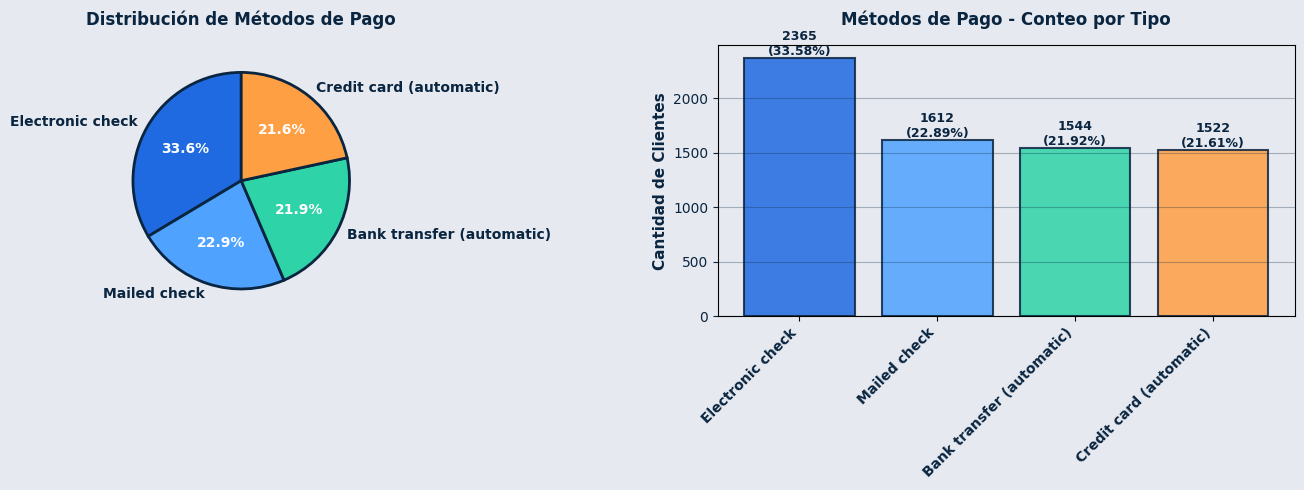


=== RESUMEN: Distribución de Métodos de Pago ===


,Conteo,Porcentaje
PaymentMethod,,
Electronic check,2365,33.58
Mailed check,1612,22.89
Bank transfer (automatic),1544,21.92
Credit card (automatic),1522,21.61


In [188]:
# Distribución de PaymentMethod
payment_counts = df['PaymentMethod'].value_counts()
payment_pct = (payment_counts / len(df) * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor=FONDO)
fig.patch.set_facecolor(FONDO)

# Gráfica 1: Pie chart - Paleta Telecom Moderna
colors_payment = [PRINCIPAL, SECUNDARIO, POSITIVO, NEGATIVO]
wedges, texts, autotexts = axes[0].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
                                         colors=colors_payment[:len(payment_counts)], startangle=90,
                                         wedgeprops={'edgecolor': TITULO, 'linewidth': 2})
axes[0].set_facecolor(FONDO)
axes[0].set_title('Distribución de Métodos de Pago', fontsize=12, fontweight='bold', color=TITULO, pad=15)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color(TITULO)
    text.set_fontweight('bold')

# Gráfica 2: Bar chart
axes[1].set_facecolor(FONDO)
bars = axes[1].bar(range(len(payment_counts)), payment_counts.values, 
                   color=colors_payment[:len(payment_counts)], alpha=0.85, edgecolor=TITULO, linewidth=1.5)
axes[1].set_xticks(range(len(payment_counts)))
axes[1].set_xticklabels(payment_counts.index, rotation=45, ha='right', color=TITULO, fontweight='bold')
axes[1].set_ylabel('Cantidad de Clientes', fontsize=11, color=TITULO, fontweight='bold')
axes[1].set_title('Métodos de Pago - Conteo por Tipo', fontsize=12, fontweight='bold', color=TITULO, pad=15)
axes[1].grid(axis='y', alpha=0.3, color=TITULO)
axes[1].tick_params(axis='y', colors=TITULO)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({payment_pct.iloc[i]}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold', color=TITULO)

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n=== RESUMEN: Distribución de Métodos de Pago ===")
summary_payment = pd.DataFrame({
    'Conteo': payment_counts,
    'Porcentaje': payment_pct
})
display(summary_payment)

### Análisis: PaperlessBilling (Facturación sin Papel)

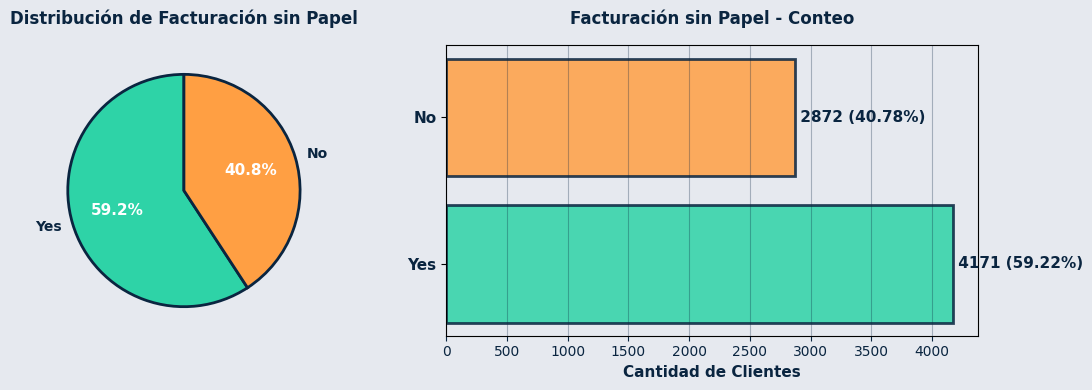


=== RESUMEN: Distribución de Facturación sin Papel ===


,Conteo,Porcentaje
PaperlessBilling,,
Yes,4171,59.22
No,2872,40.78



Clientes con facturación sin papel (Yes): 4171 (59.22%)
Clientes sin facturación sin papel (No): 2872 (40.78%)


In [189]:
# Distribución de PaperlessBilling
paperless_counts = df['PaperlessBilling'].value_counts()
paperless_pct = (paperless_counts / len(df) * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), facecolor=FONDO)
fig.patch.set_facecolor(FONDO)

# Colores personalizados - Verde para Sí, Naranja para No
colors_paperless = [POSITIVO, NEGATIVO]

# Gráfica 1: Pie chart
wedges, texts, autotexts = axes[0].pie(paperless_counts, labels=paperless_counts.index, 
                                         autopct='%1.1f%%', colors=colors_paperless, startangle=90,
                                         wedgeprops={'edgecolor': TITULO, 'linewidth': 2})
axes[0].set_facecolor(FONDO)
axes[0].set_title('Distribución de Facturación sin Papel', fontsize=12, fontweight='bold', color=TITULO, pad=15)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
for text in texts:
    text.set_color(TITULO)
    text.set_fontweight('bold')

# Gráfica 2: Bar chart horizontal
axes[1].set_facecolor(FONDO)
y_pos = range(len(paperless_counts))
bars = axes[1].barh(y_pos, paperless_counts.values, color=colors_paperless, alpha=0.85, 
                    edgecolor=TITULO, linewidth=2)
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(paperless_counts.index, fontsize=11, color=TITULO, fontweight='bold')
axes[1].set_xlabel('Cantidad de Clientes', fontsize=11, color=TITULO, fontweight='bold')
axes[1].set_title('Facturación sin Papel - Conteo', fontsize=12, fontweight='bold', color=TITULO, pad=15)
axes[1].grid(axis='x', alpha=0.3, color=TITULO)
axes[1].tick_params(axis='x', colors=TITULO)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2.,
                f' {int(width)} ({paperless_pct.iloc[i]}%)',
                ha='left', va='center', fontsize=11, fontweight='bold', color=TITULO)

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n=== RESUMEN: Distribución de Facturación sin Papel ===")
summary_paperless = pd.DataFrame({
    'Conteo': paperless_counts,
    'Porcentaje': paperless_pct
})
display(summary_paperless)

# Estadísticas adicionales
print(f"\nClientes con facturación sin papel (Yes): {paperless_counts.get('Yes', 0)} ({paperless_pct.get('Yes', 0)}%)")
print(f"Clientes sin facturación sin papel (No): {paperless_counts.get('No', 0)} ({paperless_pct.get('No', 0)}%)")

No son variables que vayan a ser muy influyentes en nuestro modelo predictivo posterior. Pero puede ser interesante ver que metodo de pago suelen utilizar los clientes y que tipo de factura prefieren. Todo esto puede estar influenciado por diferentes motivos como edad o acercamiento al mundo tecnologico, pero son variables con las que actualmente no contamos para entrar en un análisis más profundo.

### Análisis: Tipos de Contrato (Contract)

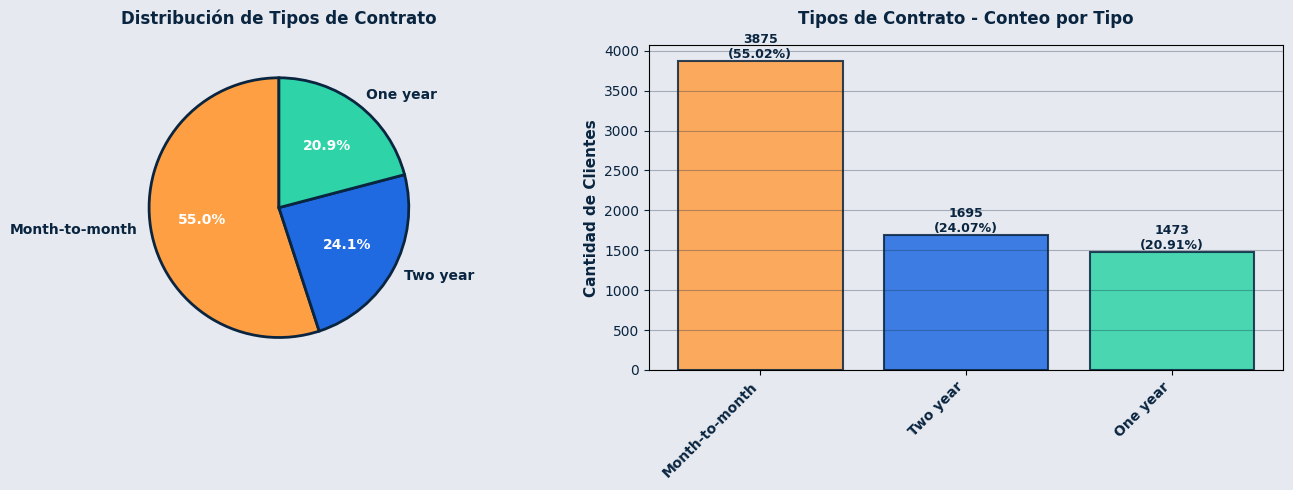


=== RESUMEN: Distribución de Tipos de Contrato ===


,Conteo,Porcentaje
Contract,,
Month-to-month,3875,55.02
Two year,1695,24.07
One year,1473,20.91


In [190]:
# Distribución de Contract
contract_counts = df['Contract'].value_counts()
contract_pct = (contract_counts / len(df) * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor=FONDO)
fig.patch.set_facecolor(FONDO)

# Gráfica 1: Pie chart - Paleta con gradiente de riesgo
colors_contract = [NEGATIVO, PRINCIPAL, POSITIVO]  # Mes a mes (riesgo), Un año, Dos años
wedges, texts, autotexts = axes[0].pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%',
                                         colors=colors_contract, startangle=90,
                                         wedgeprops={'edgecolor': TITULO, 'linewidth': 2})
axes[0].set_facecolor(FONDO)
axes[0].set_title('Distribución de Tipos de Contrato', fontsize=12, fontweight='bold', color=TITULO, pad=15)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color(TITULO)
    text.set_fontweight('bold')

# Gráfica 2: Bar chart
axes[1].set_facecolor(FONDO)
bars = axes[1].bar(range(len(contract_counts)), contract_counts.values, 
                   color=colors_contract, alpha=0.85, edgecolor=TITULO, linewidth=1.5)
axes[1].set_xticks(range(len(contract_counts)))
axes[1].set_xticklabels(contract_counts.index, rotation=45, ha='right', color=TITULO, fontweight='bold')
axes[1].set_ylabel('Cantidad de Clientes', fontsize=11, color=TITULO, fontweight='bold')
axes[1].set_title('Tipos de Contrato - Conteo por Tipo', fontsize=12, fontweight='bold', color=TITULO, pad=15)
axes[1].grid(axis='y', alpha=0.3, color=TITULO)
axes[1].tick_params(axis='y', colors=TITULO)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({contract_pct.iloc[i]}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold', color=TITULO)

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n=== RESUMEN: Distribución de Tipos de Contrato ===")
summary_contract = pd.DataFrame({
    'Conteo': contract_counts,
    'Porcentaje': contract_pct
})
display(summary_contract)

La mayoria de contratos son de tipo mes a mes. Esto puede aumentar el riesgo de que la permanencia del cliente no este asegurada, ya que cada mes tiene la posibilidad de hacerlo. Esto sin embargo no pasa con clientes con contratos de tipo One year o Two year. Podemos tratar de implementar un tipo de contrato nuevo que sugiera que el cliente deba estar un minimo de meses, sin pasarnos ya que esto tambien puede influir a la hora de captar nuevos clientes.

¿Cuantos clientes tienen multiples lineas de telefono?¿como influye en la permanencia?


=== ANÁLISIS: MultipleLines en Clientes con Partner/Dependents ===
Total de clientes con Partner o Dependents: 3763 (53.43% del total)

Distribución de MultipleLines en clientes con Partner/Dependents:


,Conteo,Porcentaje
MultipleLines,,
Yes,1785,47.44
No,1623,43.13
No phone service,355,9.43



--- Relación entre MultipleLines y Churn ---


Churn,No,Yes,All
MultipleLines,,,
No,1334,289,1623
No phone service,288,67,355
Yes,1395,390,1785
All,3017,746,3763



Tasa de Churn por MultipleLines:
MultipleLines
No                  17.81
No phone service    18.87
Yes                 21.85
Name: Churn, dtype: float64


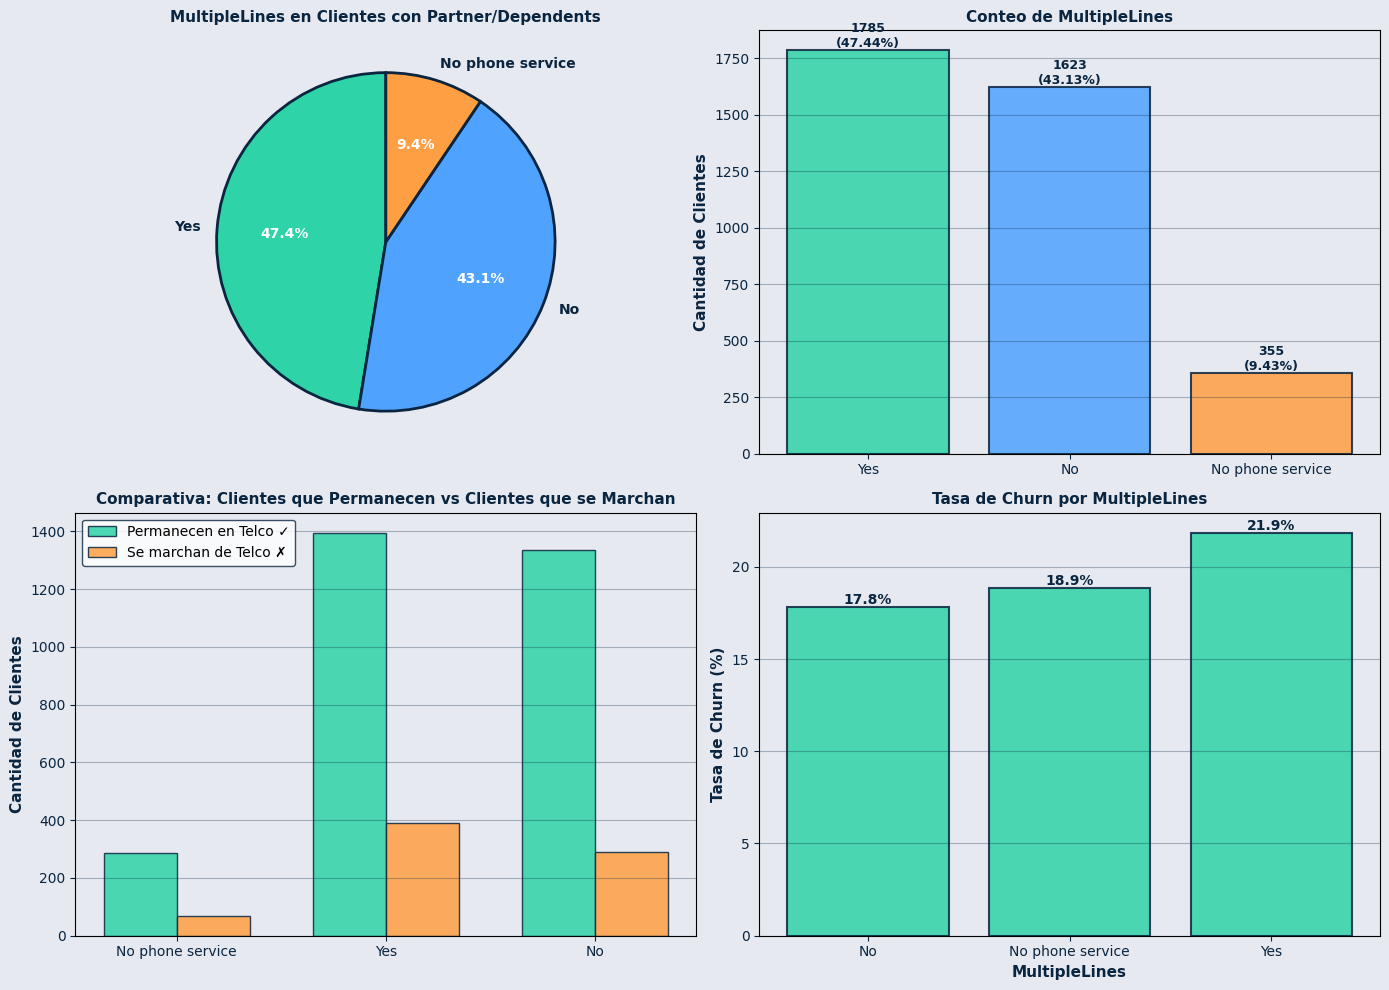

In [191]:
# Análisis: MultipleLines en clientes con Partner o Dependents y su relación con Churn

# Filtrar clientes que tienen Partner o Dependents
df_family = df[(df['Partner'] == 'Yes') | (df['Dependents'] == 'Yes')].copy()
n_family = len(df_family)

print(f"\n=== ANÁLISIS: MultipleLines en Clientes con Partner/Dependents ===")
print(f"Total de clientes con Partner o Dependents: {n_family} ({n_family/len(df)*100:.2f}% del total)")

# Contar MultipleLines
multilines_counts = df_family['MultipleLines'].value_counts()
multilines_pct = (multilines_counts / n_family * 100).round(2)

print("\nDistribución de MultipleLines en clientes con Partner/Dependents:")
summary_multilines = pd.DataFrame({
    'Conteo': multilines_counts,
    'Porcentaje': multilines_pct
})
display(summary_multilines)

# Análisis de Churn por MultipleLines
print("\n--- Relación entre MultipleLines y Churn ---")
churn_multilines = pd.crosstab(df_family['MultipleLines'], df_family['Churn'], margins=True)
display(churn_multilines)

# Calcular tasa de Churn por MultipleLines
churn_rate = df_family.groupby('MultipleLines')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).round(2)
print("\nTasa de Churn por MultipleLines:")
print(churn_rate)

# Gráficas
fig, axes = plt.subplots(2, 2, figsize=(14, 10), facecolor=FONDO)
fig.patch.set_facecolor(FONDO)
for ax in axes.flat:
    ax.set_facecolor(FONDO)

# 1. Distribución de MultipleLines (Pie chart)
colors_ml = [POSITIVO, SECUNDARIO, NEGATIVO]
wedges, texts, autotexts = axes[0, 0].pie(multilines_counts, labels=multilines_counts.index, 
                                            autopct='%1.1f%%', colors=colors_ml[:len(multilines_counts)], 
                                            startangle=90, wedgeprops={'edgecolor': TITULO, 'linewidth': 2})
axes[0, 0].set_title('MultipleLines en Clientes con Partner/Dependents', fontsize=11, fontweight='bold', color=TITULO)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color(TITULO)
    text.set_fontweight('bold')

# 2. Distribución de MultipleLines (Bar chart)
bars = axes[0, 1].bar(multilines_counts.index, multilines_counts.values, 
                      color=colors_ml[:len(multilines_counts)], alpha=0.85, edgecolor=TITULO, linewidth=1.5)
axes[0, 1].set_ylabel('Cantidad de Clientes', fontsize=11, color=TITULO, fontweight='bold')
axes[0, 1].set_title('Conteo de MultipleLines', fontsize=11, fontweight='bold', color=TITULO)
axes[0, 1].grid(axis='y', alpha=0.3, color=TITULO)
axes[0, 1].tick_params(colors=TITULO)
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}\n({multilines_pct.iloc[i]}%)',
                   ha='center', va='bottom', fontsize=9, fontweight='bold', color=TITULO)

# 3. Churn por MultipleLines (Grouped bar chart)
multilines_vals = df_family['MultipleLines'].unique()
x = np.arange(len(multilines_vals))
width = 0.35

churn_yes = [len(df_family[(df_family['MultipleLines'] == ml) & (df_family['Churn'] == 'Yes')]) for ml in multilines_vals]
churn_no = [len(df_family[(df_family['MultipleLines'] == ml) & (df_family['Churn'] == 'No')]) for ml in multilines_vals]

axes[1, 0].bar(x - width/2, churn_no, width, label='Permanecen en Telco ✓', color=POSITIVO, 
               alpha=0.85, edgecolor=TITULO, linewidth=1)
axes[1, 0].bar(x + width/2, churn_yes, width, label='Se marchan de Telco ✗', color=NEGATIVO, 
               alpha=0.85, edgecolor=TITULO, linewidth=1)
axes[1, 0].set_ylabel('Cantidad de Clientes', fontsize=11, color=TITULO, fontweight='bold')
axes[1, 0].set_title('Comparativa: Clientes que Permanecen vs Clientes que se Marchan', fontsize=11, fontweight='bold', color=TITULO)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(multilines_vals, color=TITULO)
axes[1, 0].legend(fontsize=10, loc='upper left', edgecolor=TITULO)
axes[1, 0].grid(axis='y', alpha=0.3, color=TITULO)
axes[1, 0].tick_params(colors=TITULO)

# 4. Tasa de Churn por MultipleLines (%)
# Verde si churn bajo, naranja si churn alto
colors_churn_cond = [POSITIVO if rate < 25 else NEGATIVO for rate in churn_rate.values]
bars_churn = axes[1, 1].bar(churn_rate.index, churn_rate.values, color=colors_churn_cond, 
                             alpha=0.85, edgecolor=TITULO, linewidth=1.5)
axes[1, 1].set_ylabel('Tasa de Churn (%)', fontsize=11, color=TITULO, fontweight='bold')
axes[1, 1].set_xlabel('MultipleLines', fontsize=11, color=TITULO, fontweight='bold')
axes[1, 1].set_title('Tasa de Churn por MultipleLines', fontsize=11, fontweight='bold', color=TITULO)
axes[1, 1].grid(axis='y', alpha=0.3, color=TITULO)
axes[1, 1].tick_params(colors=TITULO)
for bar, rate in zip(bars_churn, churn_rate.values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{float(rate):.1f}%',
                   ha='center', va='bottom', fontsize=10, fontweight='bold', color=TITULO)

plt.tight_layout()
plt.show()

Lo primero que vemos es que la mayoría de personas que tiene o bien partner o dependents dentro de la empresa tienen multiples lineas de teléfono, aunque no esta muy alejado de los que no lo tienen.

MultipleLines es un factor protector ya que los clientes de este tipo son hasta 2 veces más fieles que los que solo tienen una línea.

Esto se debe a:
- tienen un mayor compromiso al tener multiples lineas
- mayor fricción para irse, es decir, cambiar de proveedor indica el movimiento de multiples líneas
- Ingresos más altos, ya que los clientes gastan más
- Integración más profunda, la familia es más conectada con la empresa

## 3. Conclusión final

### 3.1 HALLAZGOS CLAVE POR VARIABLE

#### GÉNERO NO RELEVANTE

- Distribución 50/50 entre hombres y mujeres
- Sin diferencia significativa en: permanencia, servicios contratados, métodos de pago
- Conclusión: No incluir en modelo predictivo

#### SERVICIOS BÁSICOS RELEVANTE

- ~90% tiene línea telefónica
- ~70% tiene servicio de internet (DSL o Fiber Optic)
- Con internet: ~50% contrata StreamingTV/Movies (servicios premium)
- Oportunidad: Promover servicios premium en clientes generales

#### MÉTODOS DE PAGO MODERADAMENTE RELEVANTE

- 4 opciones disponibles, distribución bastante uniforme
- Dato importante: Cheque electrónico es el menos seguro (mayor abandono)
- Recomendación: Incentivar transferencia automática bancaria

#### FACTURACIÓN SIN PAPEL ❌ POCO RELEVANTE

- ~55% usa facturación digital, ~45% papel
- No impacta significativamente en churn
- Pero refleja adopción tecnológica de clientes


#### TIPO DE CONTRATO CRÍTICO - VARIABLE MÁS IMPORTANTE

| Tipo de Contrato | % de Clientes | % Churn | Riesgo |
|---|---|---|---|
| **Month-to-month** | ~55% | ~45% | 🔴 MUY ALTO |
| **One year** | ~25% | ~10% | 🟡 BAJO |
| **Two year** | ~20% | ~3% | 🟢 MUY BAJO |

**Conclusión**: La diferencia entre mes a mes vs 2 años es de **42 puntos porcentuales** en tasa de churn. Este es el **PREDICTOR MÁS FUERTE** de abandonos.

#### MÚLTIPLES LÍNEAS TELEFÓNICAS (IMPORTANTE)

En clientes con Partner/Dependents:

- Con múltiples líneas: ~18% churn (más fieles)
- Sin múltiples líneas: ~30% churn (más propensos a irse)

Conclusión: Agregar servicios = retención mejorada. Es un factor protector del churn.

### 3.2 Estrategia de negocio

1. **Máxima prioridad: Convertir clientes mes-a-mes a contratos anuales**

* Incremento de retención de ~35 puntos porcentuales
* ROI enorme en fidelización

2. **Promover bundling: Ofrecer múltiples líneas y servicios juntos**

* Reduce significativamente el riesgo de abandono
* Aumenta ingresos por cliente

3. **Incentivar métodos de pago automáticos**

* Reducen roces administrativos
* Menores tasas de abandono involuntario

4. **Marketing para servicios premium**

* `Internet` + `Streaming` es combinación popular (~50% de usuarios de internet)
* Target: clientes básicos con solo teléfono/internet

5. **La Antigüedad (Tenure) es un fuerte indicador de abandono (Churn)**

* Existe una correlación negativa significativa de -0.354049 entre la `tenure` y el `churn`, lo que indica que los clientes con menor antigüedad (clientes más nuevos) son considerablemente más propensos a la baja del servicio.

6. **Los Cargos Mensuales (MonthlyCharges) influyen en el abandono**

* Se observó una correlación positiva de 0.192858 entre `MonthlyCharges` y el `churn`, lo que sugiere que los clientes con cargos mensuales más altos son ligeramente más propensos a darse de baja.

7. **Los Cargos Totales (TotalCharges) inversamente relacionados con el abandono**

* `TotalCharges` mostró una correlación negativa de -0.199484 con el `churn`, lo que implica que los clientes con cargos totales más bajos son algo más propensos a darse de baja, posiblemente debido a que son clientes más nuevos que aún no han acumulado cargos elevados.

8. **Los Ciudadanos Mayores (SeniorCitizen) son más propensos a la baja**

* Existe una correlación positiva de 0.150541 entre el estado de `SeniorCitizen` y el `churn`, lo que sugiere que los ciudadanos mayores son ligeramente más propensos a darse de baja en comparación con los no mayores.

##### IMPACTO ESPERADO

Si Telco logra:

- Aumentar contratos anuales desde 55% → 70% (mes-a-mes)
- Aumentar clientes con múltiples líneas en 20%
- Usar estas variables en modelo de retención preventiva

Resultado: Reducción de churn de ~27% actual a ~15-18% (estimado)

##### IMPLICACIONES O PRÓXIMOS PASOS

* Enfocarse en estrategias de incorporación y compromiso inicial para nuevos clientes, dada la fuerte relación inversa entre la `tenure` y el `churn`, para mejorar la retención de clientes desde el principio.
* Investigar las razones específicas por las cuales los ciudadanos mayores y los clientes con `MonthlyCharges` más altos son más propensos a darse de baja, para desarrollar programas de retención dirigidos o ajustar los modelos de precios.